<a href="https://colab.research.google.com/github/anupkrmaurya/Emotion-Classification-Model/blob/main/Emotion_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install Required Libraries
!pip install tensorflow keras gradio seaborn


In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [3]:
#Load & View Dataset
#Uploading the dataset with name 'training.csv'

data = pd.read_csv("training.csv")
print("Sample data:")
data.head()


Sample data:


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [5]:
#Preprocess Text & Labels

texts = data["text"].tolist()
labels = data["label"].tolist()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# One-hot encoding labels
num_classes = len(np.unique(labels))
labels_onehot = to_categorical(labels, num_classes=num_classes)


In [6]:
#Train-Test Split

xtrain, xtest, ytrain, ytest = train_test_split(
    padded_sequences, labels_onehot, test_size=0.2, random_state=42
)


In [9]:
#Build & Train the Model

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.3846 - loss: 1.5177 - val_accuracy: 0.6587 - val_loss: 0.8976
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8528 - loss: 0.4669 - val_accuracy: 0.8159 - val_loss: 0.5635
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9823 - loss: 0.0671 - val_accuracy: 0.8228 - val_loss: 0.6018
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9953 - loss: 0.0271 - val_accuracy: 0.8191 - val_loss: 0.6299
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9964 - loss: 0.0159 - val_accuracy: 0.8197 - val_loss: 0.6571
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9969 - loss: 0.0158 - val_accuracy: 0.8222 - val_loss: 0.7088
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.8103 - val_loss: 0.7377
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9965 - loss: 0.0123 - 

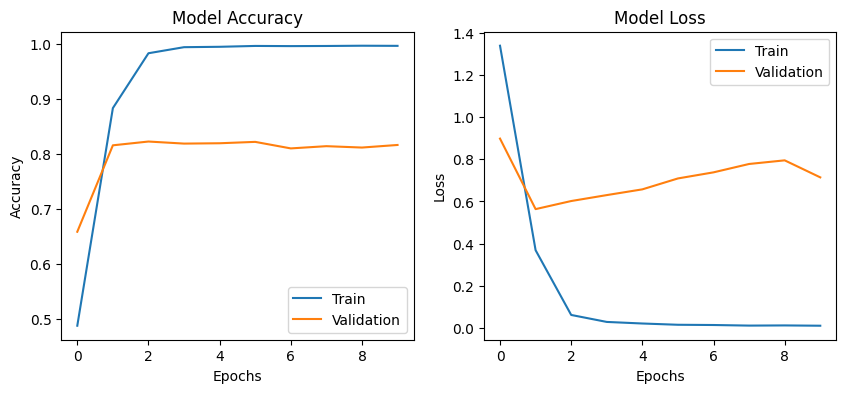

In [10]:
# Visualize Accuracy & Loss

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       946
           1       0.82      0.90      0.86      1021
           2       0.76      0.63      0.69       296
           3       0.85      0.70      0.76       427
           4       0.79      0.70      0.74       397
           5       0.69      0.63      0.66       113

    accuracy                           0.82      3200
   macro avg       0.79      0.74      0.76      3200
weighted avg       0.82      0.82      0.81      3200



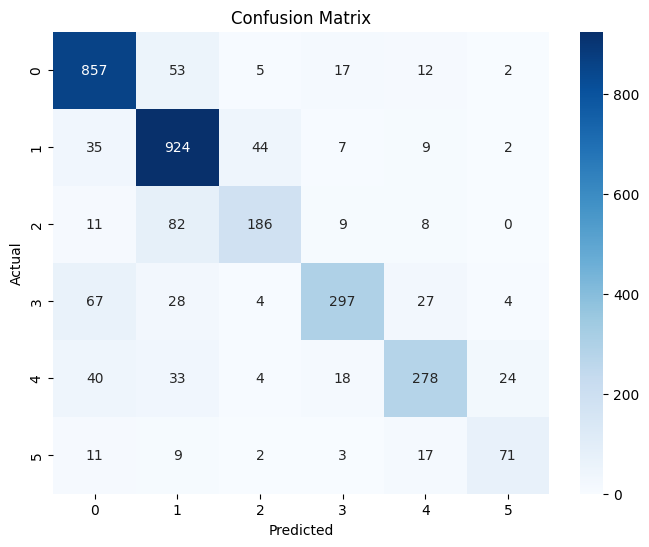

In [12]:
# Evaluate with Classification Report & Confusion Matrix

y_pred = model.predict(xtest)
y_true = np.argmax(ytest, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
#Prediction Function

label_names = {
    0: 'sad',
    1: 'happy',
    2: 'love',
    3: 'anger',
    4: 'fear'
}

def predict_emotion(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)
    pred = model.predict(padded)
    pred_class = np.argmax(pred[0])
    return label_names.get(pred_class, "Unknown")


In [14]:
# Gradio Interface for Live Demo

examples = [
    ["I feel so happy today!"],
    ["I'm really scared about tomorrow."],
    ["I love this movie."],
    ["Why did you do that? I’m angry."],
    ["Feeling down and gloomy."]
]

iface = gr.Interface(
    fn=predict_emotion,
    inputs=gr.Textbox(lines=2, placeholder="Enter your sentence..."),
    outputs="text",
    title="Emotion Classifier AI",
    description="Enter a sentence and see the predicted emotion",
    examples=examples
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e5b097690876387699.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
